# Employee Attrition

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import tree
from imblearn.over_sampling import SMOTE
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset
data=pd.read_csv(r"employee_attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# numerical data description
data.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,2.729932,2.063946,2.728571,6502.931293,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,0.711561,1.106940,1.102846,4707.956783,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# seperating categorical and numerical data
num=[]
cat=[]
for col,val in data.iteritems():
    if(val.dtype==object):
        cat.append(col)
for col,val in data.iteritems():
    if(val.dtype!=object):
        num.append(col)

In [7]:
# categorical and numerical data
num_data=data[num]
cat_data=data[cat]

In [8]:
#categorical data
cat_data

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,College,Other,Very High,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,College,Medical,High,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Below College,Medical,Very High,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Bachelor,Medical,Very High,Male,Sales Executive,Married,Y,No


In [9]:
# checking the unique values
cat_data.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [10]:
# indexing to find releveant values to see if one column is affecting the other
cat_data["JobRole"][cat_data["Department"]=='Research & Development'].value_counts()

Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Research Director             80
Manager                       54
Name: JobRole, dtype: int64

In [11]:
# finding unique terms in ordinal data 
cat_data["EnvironmentSatisfaction"].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [12]:
# ordinal data mapping Education and EnvironmentalSatisfaction
edu={'Below College':1,'College':2,'Bachelor':3,'Master':4,'PHD':5}
evs={'Low':1,'Medium':2,'High':3,'Very High':4}

In [13]:
#  updating ordinal data columns with maped results
cat_data["Education"]=cat_data["Education"].map(edu)
cat_data["EnvironmentSatisfaction"]=cat_data["EnvironmentSatisfaction"].map(evs)

In [14]:
# concatinating mapped data 
ord_data=pd.concat([cat_data["Education"],cat_data["EnvironmentSatisfaction"]],axis=1)

In [15]:
# dropping unwanted columns with attrirtion 
cat_data=cat_data.drop(['Attrition','Education','EnvironmentSatisfaction','Over18'],axis=1)
num_data=num_data.drop(['EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [16]:
#categoriacl data 
cat_data

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [17]:
#  numerical data 
num_data

,Age,DailyRate,DistanceFromHome,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,3,2,4,5993,19479,8,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,61,2,2,2,5130,24907,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,92,2,1,3,2090,2396,6,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,56,3,1,3,2909,23159,1,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,40,3,1,2,3468,16632,9,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,4,2,4,2571,12290,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,42,2,3,1,9991,21457,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,87,4,2,2,6142,5174,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,63,2,2,2,5390,13243,2,...,3,4,0,17,3,2,9,6,0,8


In [18]:
# assigning DUMMY vairables to categorical data 
cat_data=pd.get_dummies(cat_data,drop_first=True)

In [19]:
cat_data

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1466,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1467,0,1,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1468,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [20]:
# concatinating ordinal and nominal data
cat_data=pd.concat([cat_data,ord_data],axis=1)

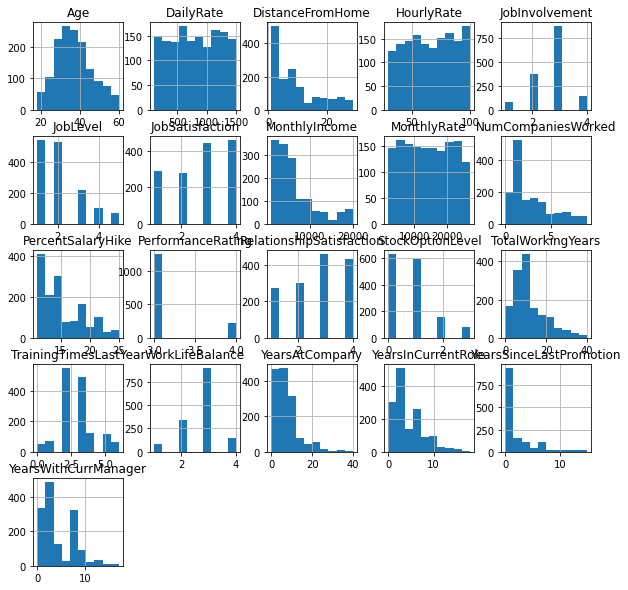

In [21]:
# # histogram of numerical data
num_data.hist(figsize=(10,10))
plt.show()

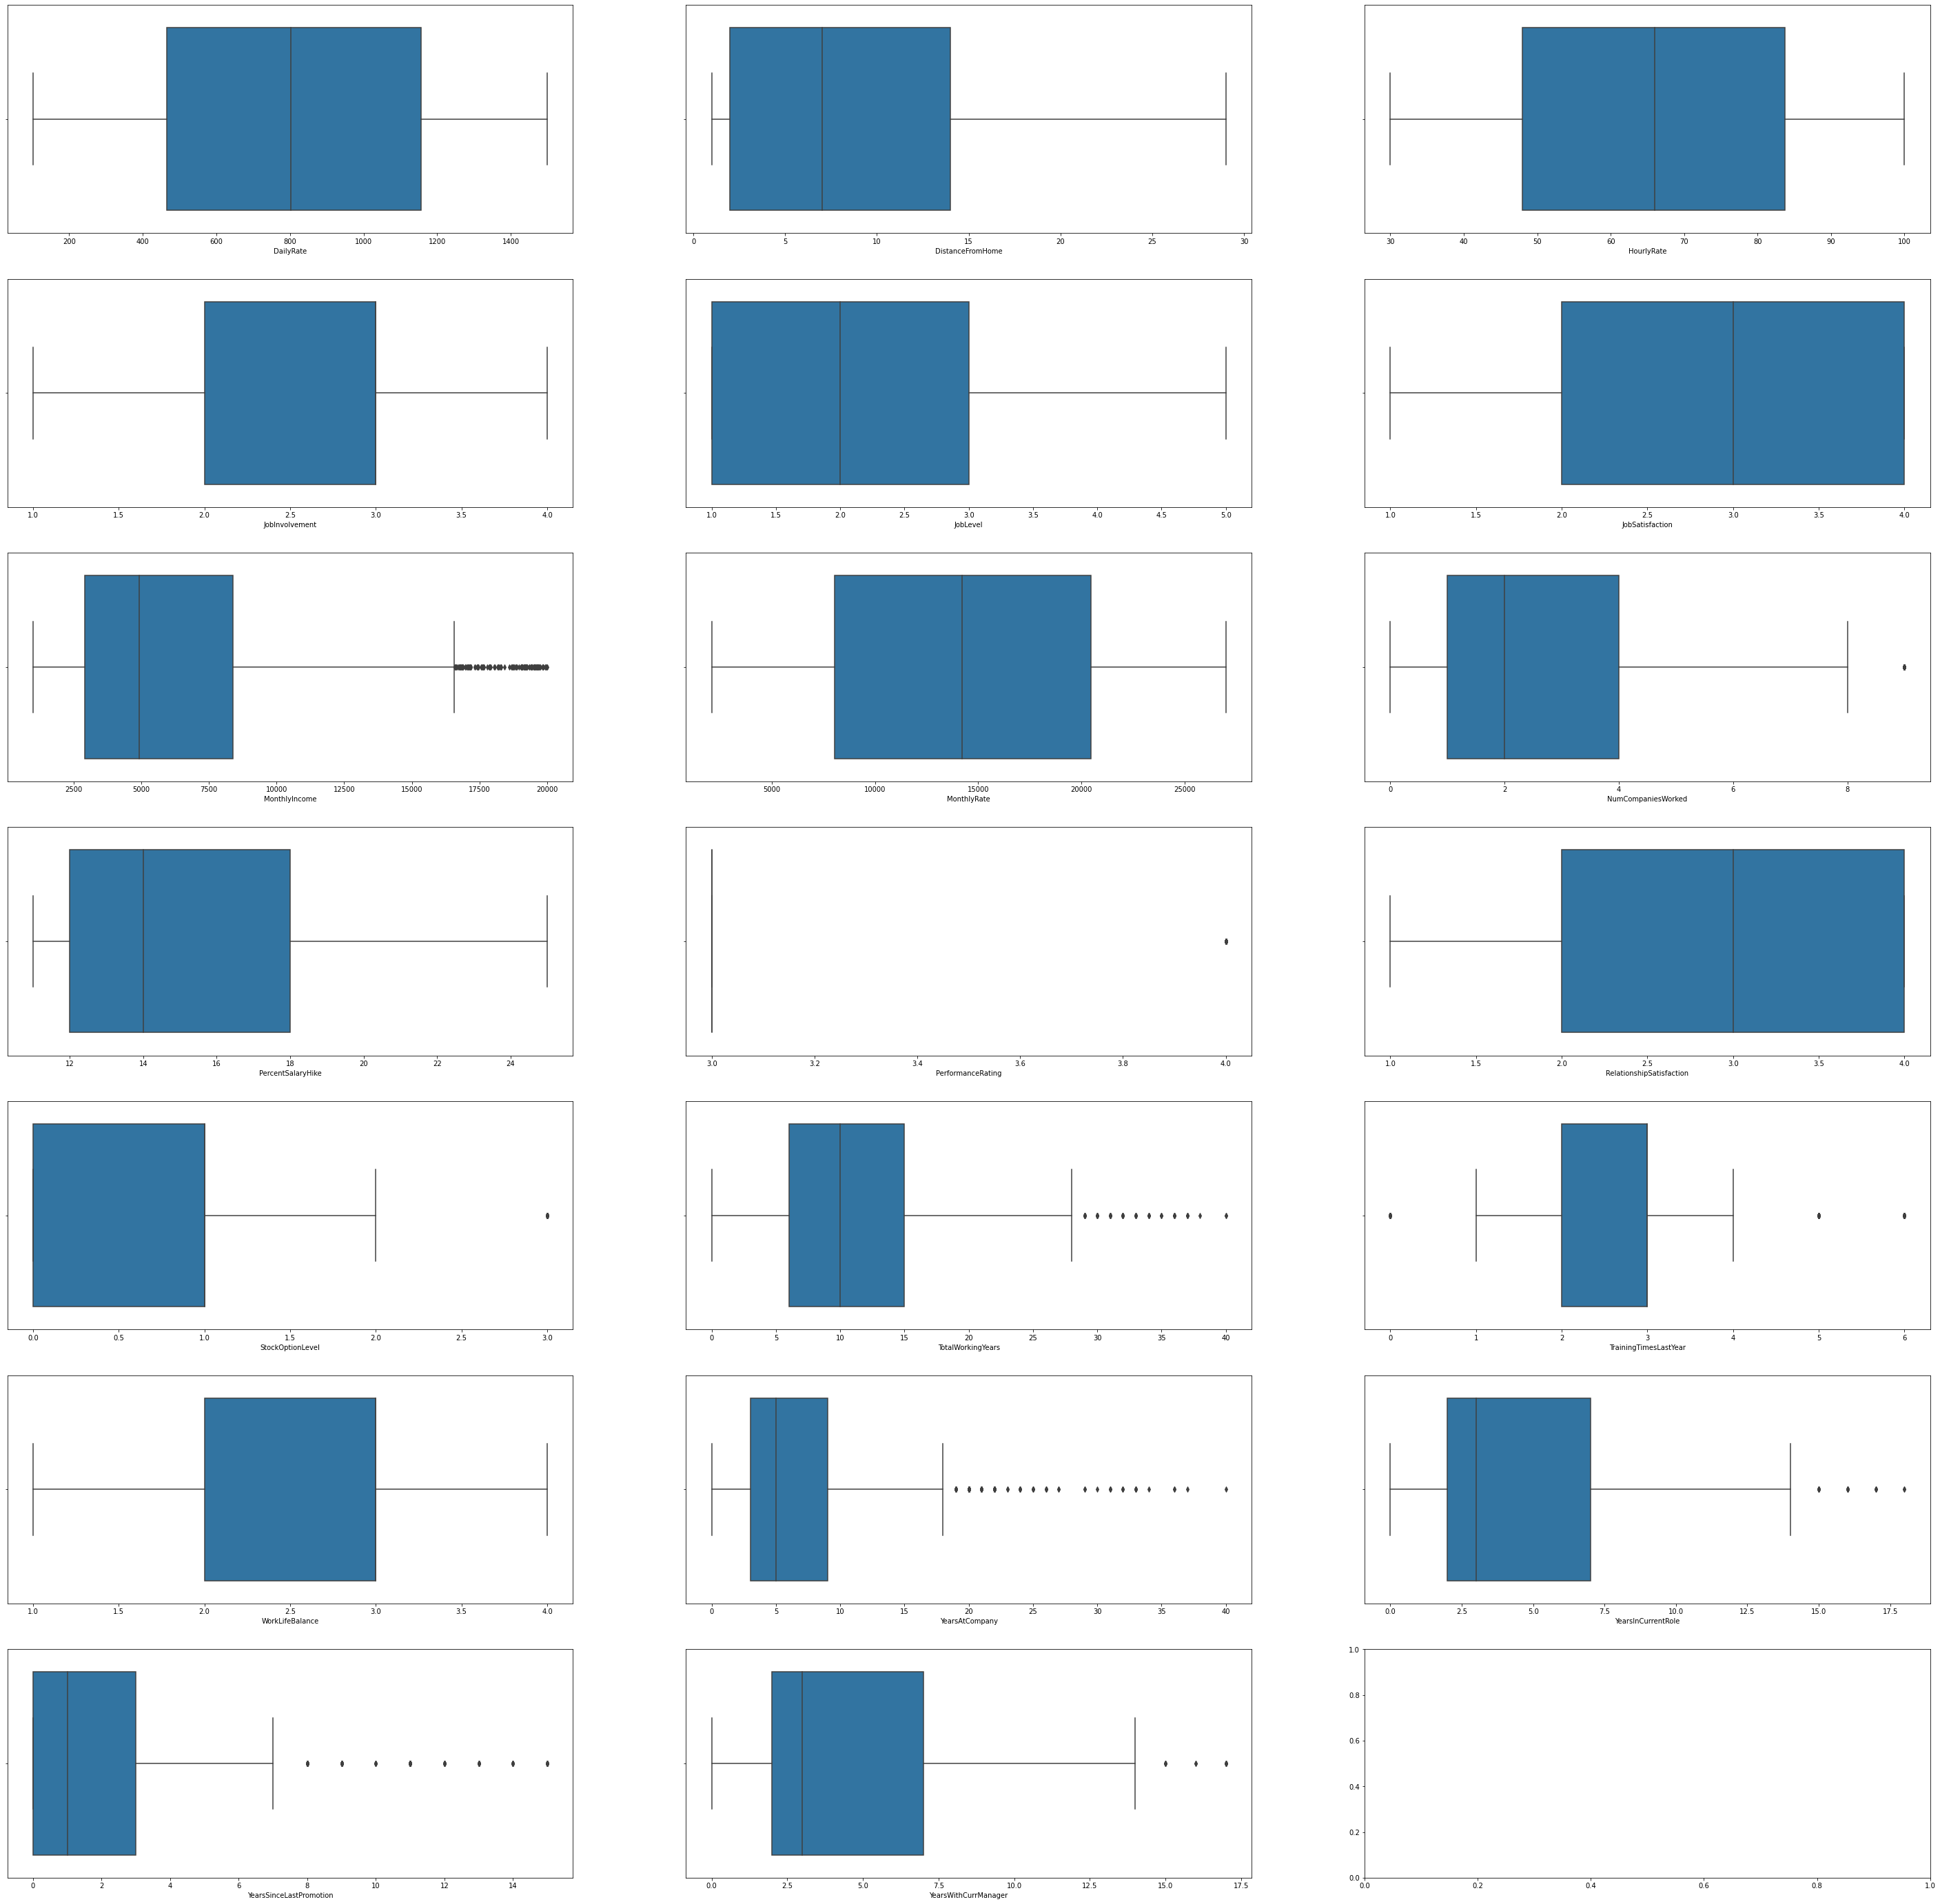

In [22]:
# boxplots for numerical data 
plt.figure(figsize=(50,50))
for i,col in enumerate(num_data,1):
    sns.boxplot(x=col,data=num_data)
    plt.subplot(7,3,i)

In [23]:
# concat numerical and categorical data
# splitting data into dependent and independent variables
x=pd.concat([cat_data,num_data],axis=1)
y=data["Attrition"].map({'Yes':1,'No':0})


In [24]:
# trian test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,stratify=y)
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train,y_train=SMOTE().fit_sample(x_train,y_train)
from sklearn.model_selection import KFold
CV=KFold(n_splits=10,random_state=1,shuffle=True)

In [25]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree_pred=dtree.predict(x_test)
dtree_train_pred=dtree.predict(x_train)
#metrics
print(f'test accuracy:{accuracy_score(y_test,dtree_pred)}')
print(f'train accuracy:{accuracy_score(y_train,dtree_train_pred)}')
print(f'test calssification report:{classification_report(y_test,dtree_pred)}')
print(f'train classification report:{classification_report(y_train,dtree_train_pred)}')

test accuracy:0.7857142857142857
train accuracy:1.0
test calssification report:              precision    recall  f1-score   support

           0       0.89      0.85      0.87       247
           1       0.36      0.45      0.40        47

    accuracy                           0.79       294
   macro avg       0.63      0.65      0.63       294
weighted avg       0.81      0.79      0.79       294

train classification report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



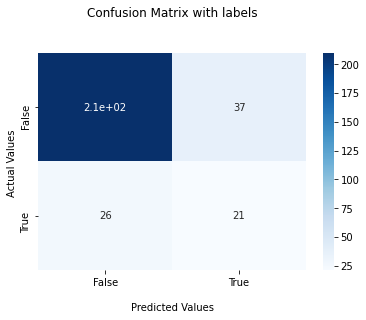

In [26]:
DT_Matrix=confusion_matrix(y_test,dtree_pred)
DTmatrixplot=sns.heatmap(DT_Matrix, annot=True, cmap='Blues')
DTmatrixplot.set_title('Confusion Matrix with labels\n\n');
DTmatrixplot.set_xlabel('\nPredicted Values')
DTmatrixplot.set_ylabel('Actual Values ');
DTmatrixplot.xaxis.set_ticklabels(['False','True'])
DTmatrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

{'splitter': 'random', 'min_samples_split': 1.0, 'min_samples_leaf': 5, 'max_leaf_nodes': 15, 'max_features': 'sqrt', 'max_depth': 2.0, 'criterion': 'entropy', 'ccp_alpha': 3.8421052631578947}
accuracy score after cross validation is :0.8401360544217688


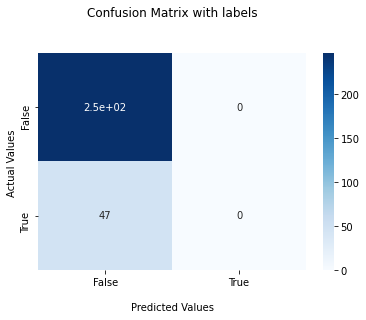

In [27]:
dtree_grid={'criterion':['gini','entropy'],
         'splitter':['best','random'],
         'max_depth':[i for i in np.linspace(1,20,20)],
         'min_samples_split':[i for i in np.linspace(1,20,50)],
         'min_samples_leaf':[i for i in range(1,10,1)],
         'max_features':['auto','sqrt','log2'],
         'max_leaf_nodes':[i for i in range(1,20,1)],
         'ccp_alpha':[i for i in np.linspace(1,10,20)]
        }
dtree_cv=RandomizedSearchCV(cv=CV,estimator=dtree,n_iter=100,n_jobs=-1,param_distributions=dtree_grid,random_state=1)
dtree_cv.fit(x_train,y_train)
dtree_cv_predict=dtree_cv.predict(x_test)
print(dtree_cv.best_params_)
print("accuracy score after cross validation is :{}".format(accuracy_score(y_test,dtree_cv_predict)))
DTcv_Matrix=confusion_matrix(y_test,dtree_cv_predict)
DTcvmatrixplot=sns.heatmap(DTcv_Matrix, annot=True, cmap='Blues')
DTcvmatrixplot.set_title('Confusion Matrix with labels\n\n');
DTcvmatrixplot.set_xlabel('\nPredicted Values')
DTcvmatrixplot.set_ylabel('Actual Values ');
DTcvmatrixplot.xaxis.set_ticklabels(['False','True'])
DTcvmatrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

In [28]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
nb_train_pred=nb.predict(x_train)
print(f'test accuracy:{accuracy_score(y_test,nb_pred)}')
print(f'train accuracy:{accuracy_score(y_train,nb_train_pred)}')
print(f'test calssification report:{classification_report(y_test,nb_pred)}')
print(f'train classification report:{classification_report(y_train,nb_train_pred)}')

test accuracy:0.5782312925170068
train accuracy:0.678498985801217
test calssification report:              precision    recall  f1-score   support

           0       0.94      0.53      0.68       247
           1       0.25      0.81      0.38        47

    accuracy                           0.58       294
   macro avg       0.59      0.67      0.53       294
weighted avg       0.83      0.58      0.63       294

train classification report:              precision    recall  f1-score   support

           0       0.77      0.51      0.61       986
           1       0.63      0.85      0.73       986

    accuracy                           0.68      1972
   macro avg       0.70      0.68      0.67      1972
weighted avg       0.70      0.68      0.67      1972



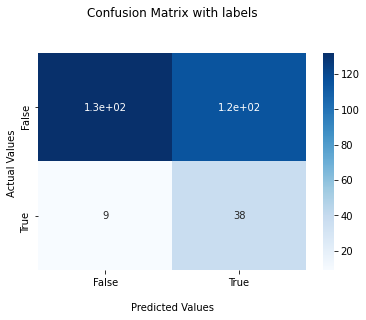

In [29]:
nb_Matrix=confusion_matrix(y_test,nb_pred)
nb_matrixplot=sns.heatmap(nb_Matrix, annot=True, cmap='Blues')
nb_matrixplot.set_title('Confusion Matrix with labels\n\n');
nb_matrixplot.set_xlabel('\nPredicted Values')
nb_matrixplot.set_ylabel('Actual Values ');
nb_matrixplot.xaxis.set_ticklabels(['False','True'])
nb_matrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

GaussianNB(var_smoothing=0.00025075000000000005)
0.5782312925170068


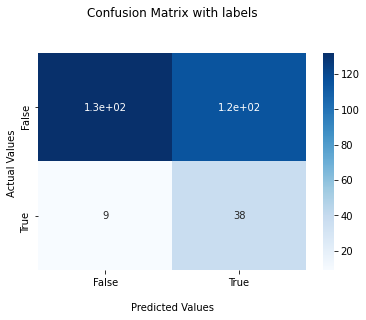

In [30]:
nb_grid={'var_smoothing':[i for i in np.linspace(0.000001,0.001,5)]}
nb_cv=RandomizedSearchCV(estimator=nb,cv=CV,n_jobs=-1,param_distributions=nb_grid)
nb_cv.fit(x_train,y_train)
nb_cv_pred=nb_cv.predict(x_test)
print(nb_cv.best_estimator_)
print(accuracy_score(y_test,nb_cv_pred))
nb_Matrix=confusion_matrix(y_test,nb_cv_pred)
nbmatrixplot=sns.heatmap(nb_Matrix, annot=True, cmap='Blues')
nbmatrixplot.set_title('Confusion Matrix with labels\n\n');
nbmatrixplot.set_xlabel('\nPredicted Values')
nbmatrixplot.set_ylabel('Actual Values ');
nbmatrixplot.xaxis.set_ticklabels(['False','True'])
nbmatrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

In [31]:
SVM=SVC(probability=True)
SVM.fit(x_train,y_train)
svm_pred=SVM.predict(x_test)
svm_train_pred=SVM.predict(x_train)
#metrics
print(f'test accuracy:{accuracy_score(y_test,svm_pred)}')
print(f'train accuracy:{accuracy_score(y_train,svm_train_pred)}')
print(f'test calssification report:{classification_report(y_test,svm_pred)}')
print(f'train classification report:{classification_report(y_train,svm_train_pred)}')

test accuracy:0.8333333333333334
train accuracy:0.9533468559837728
test calssification report:              precision    recall  f1-score   support

           0       0.90      0.90      0.90       247
           1       0.48      0.49      0.48        47

    accuracy                           0.83       294
   macro avg       0.69      0.69      0.69       294
weighted avg       0.83      0.83      0.83       294

train classification report:              precision    recall  f1-score   support

           0       0.97      0.94      0.95       986
           1       0.94      0.97      0.95       986

    accuracy                           0.95      1972
   macro avg       0.95      0.95      0.95      1972
weighted avg       0.95      0.95      0.95      1972



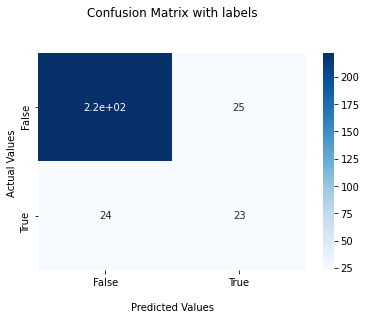

In [32]:
svm_Matrix=confusion_matrix(y_test,svm_pred)
svm_matrixplot=sns.heatmap(svm_Matrix, annot=True, cmap='Blues')
svm_matrixplot.set_title('Confusion Matrix with labels\n\n');
svm_matrixplot.set_xlabel('\nPredicted Values')
svm_matrixplot.set_ylabel('Actual Values ');
svm_matrixplot.xaxis.set_ticklabels(['False','True'])
svm_matrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 8, 'class_weight': 'balanced', 'C': 9.526315789473683}
0.8333333333333334


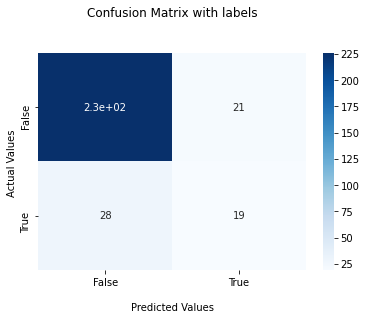

In [33]:
svm_grid={'C':[i for i in np.linspace(1,10,20)],
         'kernel':['linear','poly','rbf','sigmoid'],
         'degree':[i for i in range(1,10,1)],
         'gamma':['scale','auto'],
       
         'class_weight':['dict','balanced']}
svm_cv=RandomizedSearchCV(cv=CV,estimator=SVM,n_iter=300,n_jobs=-1,param_distributions=svm_grid,random_state=1)
svm_cv.fit(x_train,y_train)
svm_cv_predict=svm_cv.predict(x_test)
print(svm_cv.best_params_)
print(accuracy_score(y_test,svm_cv_predict))
svm_cv_Matrix=confusion_matrix(y_test,svm_cv_predict)
svm_cv_matrixplot=sns.heatmap(svm_cv_Matrix, annot=True, cmap='Blues')
svm_cv_matrixplot.set_title('Confusion Matrix with labels\n\n');
svm_cv_matrixplot.set_xlabel('\nPredicted Values')
svm_cv_matrixplot.set_ylabel('Actual Values ');
svm_cv_matrixplot.xaxis.set_ticklabels(['False','True'])
svm_cv_matrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

MLP

In [34]:
MLP=MLPClassifier()
MLP.fit(x_train,y_train)
mlp_pred=MLP.predict(x_test)
mlp_train_pred=MLP.predict(x_train)
print(f'test accuracy:{accuracy_score(y_test,mlp_pred)}')
print(f'train accuracy:{accuracy_score(y_train,mlp_train_pred)}')
print(f'test calssification report:{classification_report(y_test,mlp_pred)}')
print(f'train classification report:{classification_report(y_train,mlp_train_pred)}')

test accuracy:0.8163265306122449
train accuracy:0.9959432048681541
test calssification report:              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.43      0.43      0.43        47

    accuracy                           0.82       294
   macro avg       0.66      0.66      0.66       294
weighted avg       0.82      0.82      0.82       294

train classification report:              precision    recall  f1-score   support

           0       1.00      0.99      1.00       986
           1       0.99      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



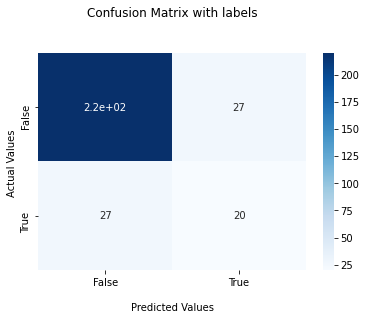

In [35]:
mlp_Matrix=confusion_matrix(y_test,mlp_pred)
mlp_matrixplot=sns.heatmap(mlp_Matrix, annot=True, cmap='Blues')
mlp_matrixplot.set_title('Confusion Matrix with labels\n\n');
mlp_matrixplot.set_xlabel('\nPredicted Values')
mlp_matrixplot.set_ylabel('Actual Values ');
mlp_matrixplot.xaxis.set_ticklabels(['False','True'])
mlp_matrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

In [36]:
MLP_grid={'hidden_layer_sizes': [(10,)],
         'activation': ['tanh', 'relu'],
         'solver': ['adam'], 
         'alpha': [i for i in np.linspace(0.0001,1,5)],
         'max_iter':[i for i in range(100,200,100)]
         }
mlp_cv=RandomizedSearchCV(cv=CV,estimator=MLP,n_iter=50,n_jobs=-1,param_distributions=MLP_grid,random_state=1)
mlp_cv.fit(x_train,y_train)
mlp_cv_pred=mlp_cv.predict(x_test)
print(mlp_cv.best_estimator_)
print(accuracy_score(y_test,mlp_cv_pred))

MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)
0.7891156462585034


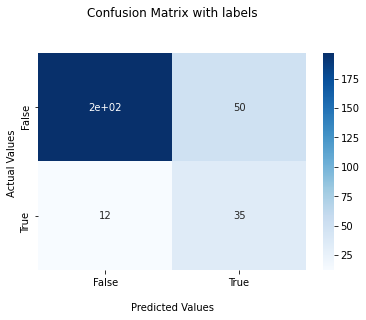

In [39]:
mlp_cvMatrix=confusion_matrix(y_test,mlp_cv_pred)
mlp_cvmatrixplot=sns.heatmap(mlp_cvMatrix, annot=True, cmap='Blues')
mlp_cvmatrixplot.set_title('Confusion Matrix with labels\n\n');
mlp_cvmatrixplot.set_xlabel('\nPredicted Values')
mlp_cvmatrixplot.set_ylabel('Actual Values ');
mlp_cvmatrixplot.xaxis.set_ticklabels(['False','True'])
mlp_cvmatrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

Decision tree : ROC AUC=0.649
naive bayes: ROC AUC=0.768
Support vector machine: ROC AUC=0.800
Multi layer perceptron: ROC AUC=0.794


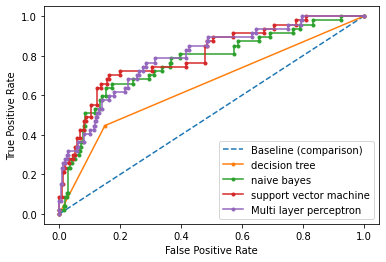

In [37]:
# auc roc curve for normal validation
dtree_prob=dtree.predict_proba(x_test)
nb_prob=nb.predict_proba(x_test)
svm_prob=SVM.predict_proba(x_test)
mlp_prob=MLP.predict_proba(x_test)
dtree_prob=dtree_prob[:, 1]
nb_prob=nb_prob[:, 1]
svm_prob=svm_prob[:, 1]
mlp_prob=mlp_prob[:, 1]
ns_prob = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_prob)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)#same for all algos'
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_prob)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_prob)
dtree_auc = roc_auc_score(y_test, dtree_prob)
nb_auc = roc_auc_score(y_test, nb_prob)
svm_auc = roc_auc_score(y_test, svm_prob)
mlp_auc = roc_auc_score(y_test, mlp_prob)
print('Decision tree : ROC AUC=%.3f' % (dtree_auc))
print('naive bayes: ROC AUC=%.3f' % (nb_auc))
print('Support vector machine: ROC AUC=%.3f' % (svm_auc))
print('Multi layer perceptron: ROC AUC=%.3f' % (mlp_auc))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (comparison)')
plt.plot(dtree_fpr, dtree_tpr, marker='.', label='decision tree')
plt.plot(nb_fpr, nb_tpr, marker='.', label='naive bayes')
plt.plot(svm_fpr, svm_tpr, marker='.', label='support vector machine')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Multi layer perceptron')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Decission tree with tuning: ROC AUC=0.500
Naive bayes with tuning: ROC AUC=0.768
Support vector machine with tuning: ROC AUC=0.771
multi layer perceptron with tuning: ROC AUC=0.846


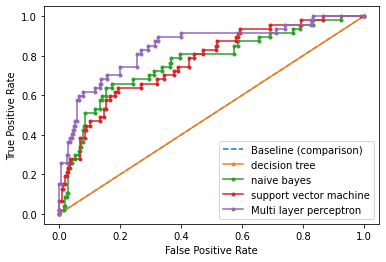

In [38]:
# auc roc curve for cross validation validation
dtreecv_prob=dtree_cv.predict_proba(x_test)
nbcv_prob=nb_cv.predict_proba(x_test)
svmcv_prob=svm_cv.predict_proba(x_test)
mlpcv_prob=mlp_cv.predict_proba(x_test)
dtreecv_prob=dtreecv_prob[:, 1]
nbcv_prob=nbcv_prob[:, 1]
svmcv_prob=svmcv_prob[:, 1]
mlpcv_prob=mlpcv_prob[:, 1]
ns_prob = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_prob)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)#same for all algos'
dtreecv_fpr, dtreecv_tpr, _ = roc_curve(y_test, dtreecv_prob)
nbcv_fpr, nbcv_tpr, _ = roc_curve(y_test, nbcv_prob)
svmcv_fpr, svmcv_tpr, _ = roc_curve(y_test, svmcv_prob)
mlpcv_fpr, mlpcv_tpr, _ = roc_curve(y_test, mlpcv_prob)
dtreecv_auc = roc_auc_score(y_test, dtreecv_prob)
nbcv_auc = roc_auc_score(y_test, nbcv_prob)
svmcv_auc = roc_auc_score(y_test, svmcv_prob)
mlpcv_auc = roc_auc_score(y_test, mlpcv_prob)
print('Decission tree with tuning: ROC AUC=%.3f' % (dtreecv_auc))
print('Naive bayes with tuning: ROC AUC=%.3f' % (nbcv_auc))
print('Support vector machine with tuning: ROC AUC=%.3f' % (svmcv_auc))
print('multi layer perceptron with tuning: ROC AUC=%.3f' % (mlpcv_auc))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (comparison)')
plt.plot(dtreecv_fpr, dtreecv_tpr, marker='.', label='decision tree')
plt.plot(nbcv_fpr, nbcv_tpr, marker='.', label='naive bayes')
plt.plot(svmcv_fpr, svmcv_tpr, marker='.', label='support vector machine')
plt.plot(mlpcv_fpr, mlpcv_tpr, marker='.', label='Multi layer perceptron')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Credit Card fraud detection

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import tree
from imblearn.over_sampling import SMOTE
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset and intial exploration
df=pd.read_csv(r'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.shape) # shape of dataset

(284807, 31)


In [4]:
# dropping the unwanted columns and rows
df.drop('Time',inplace=True,axis=1)
df.drop_duplicates(inplace=True)

In [5]:
# exploring data after excluding unwanted data
print(df.shape)
print(df.head())
print(df.Class.value_counts())

(275663, 30)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Clas

In [6]:
#exploratory data analysis
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     27

Text(0.5, 1.0, 'Credit Card Fraud ')

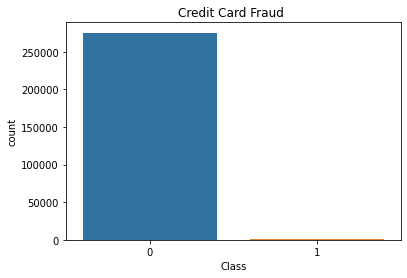

In [7]:
# plotting the output values 
sns.countplot(data = df, x = 'Class')
plt.title('Credit Card Fraud ')

array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

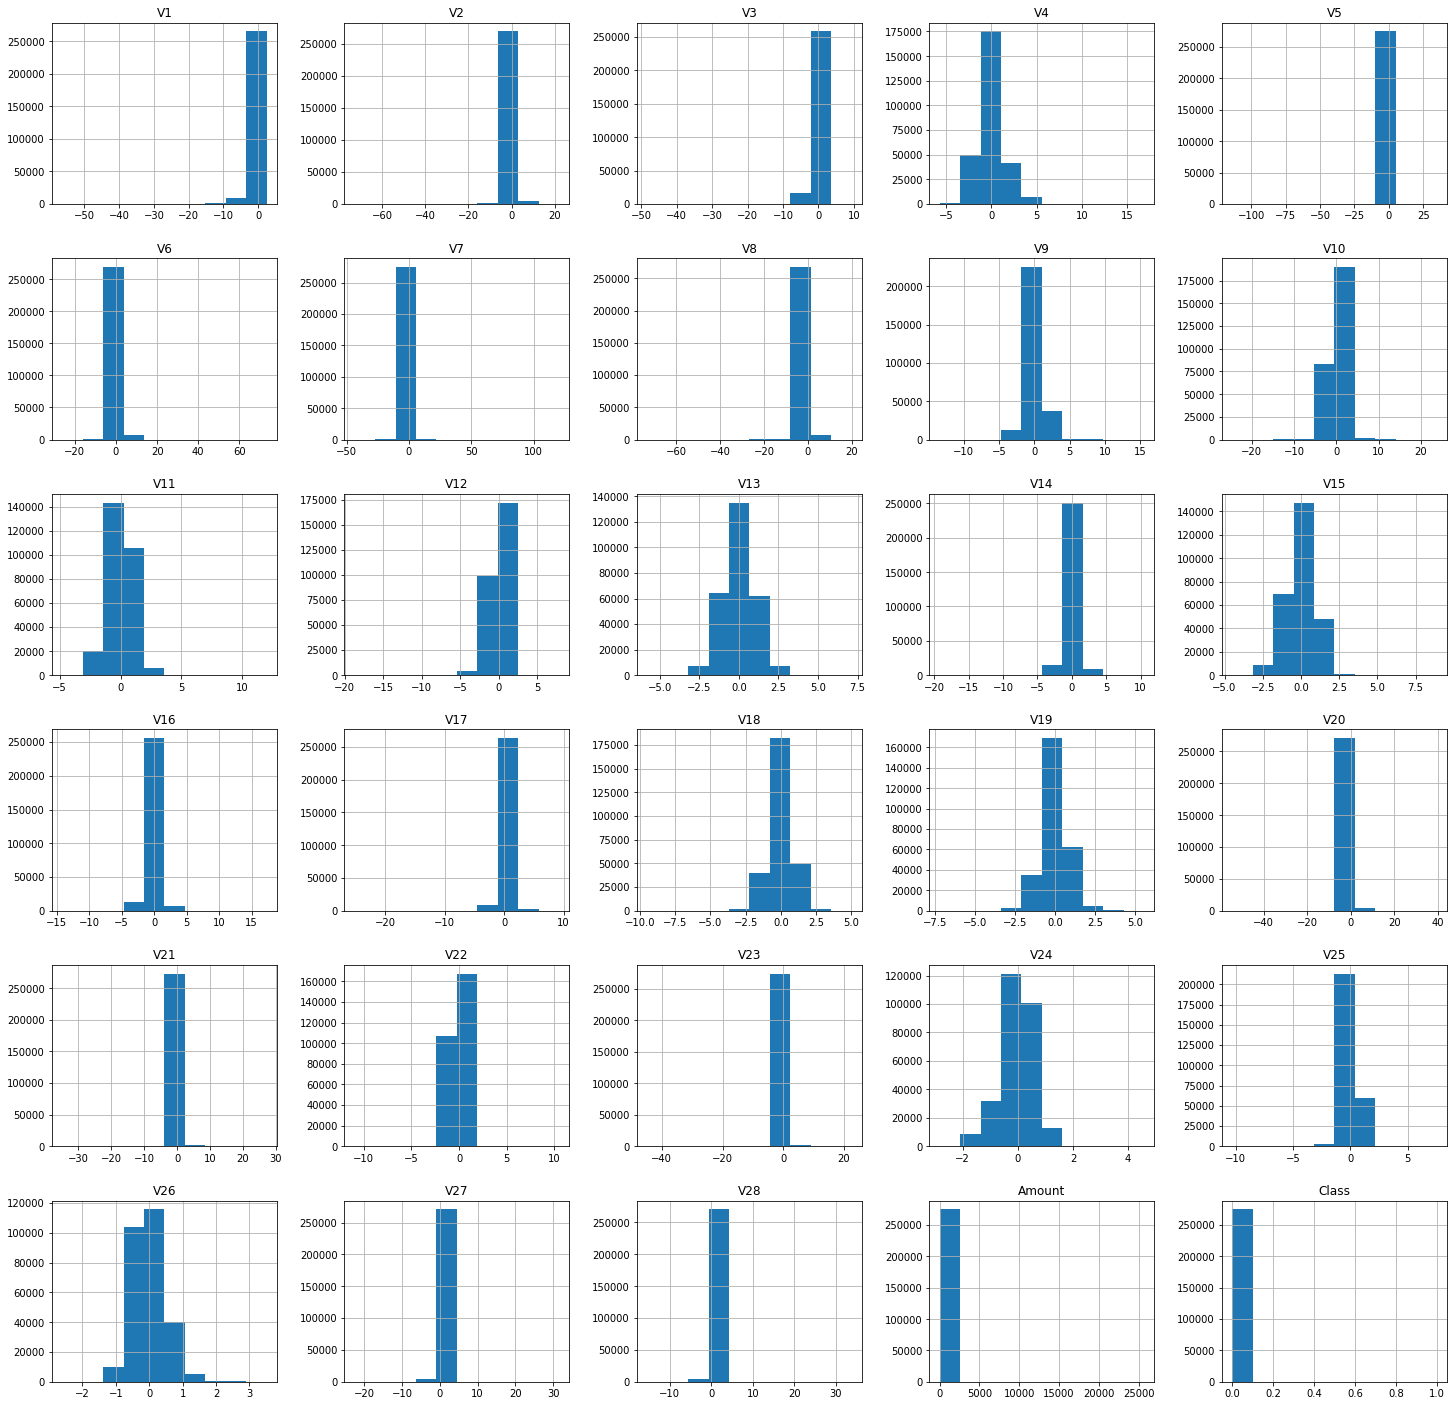

In [8]:
# Histogram
df.hist(figsize=(25,25))

<AxesSubplot:>

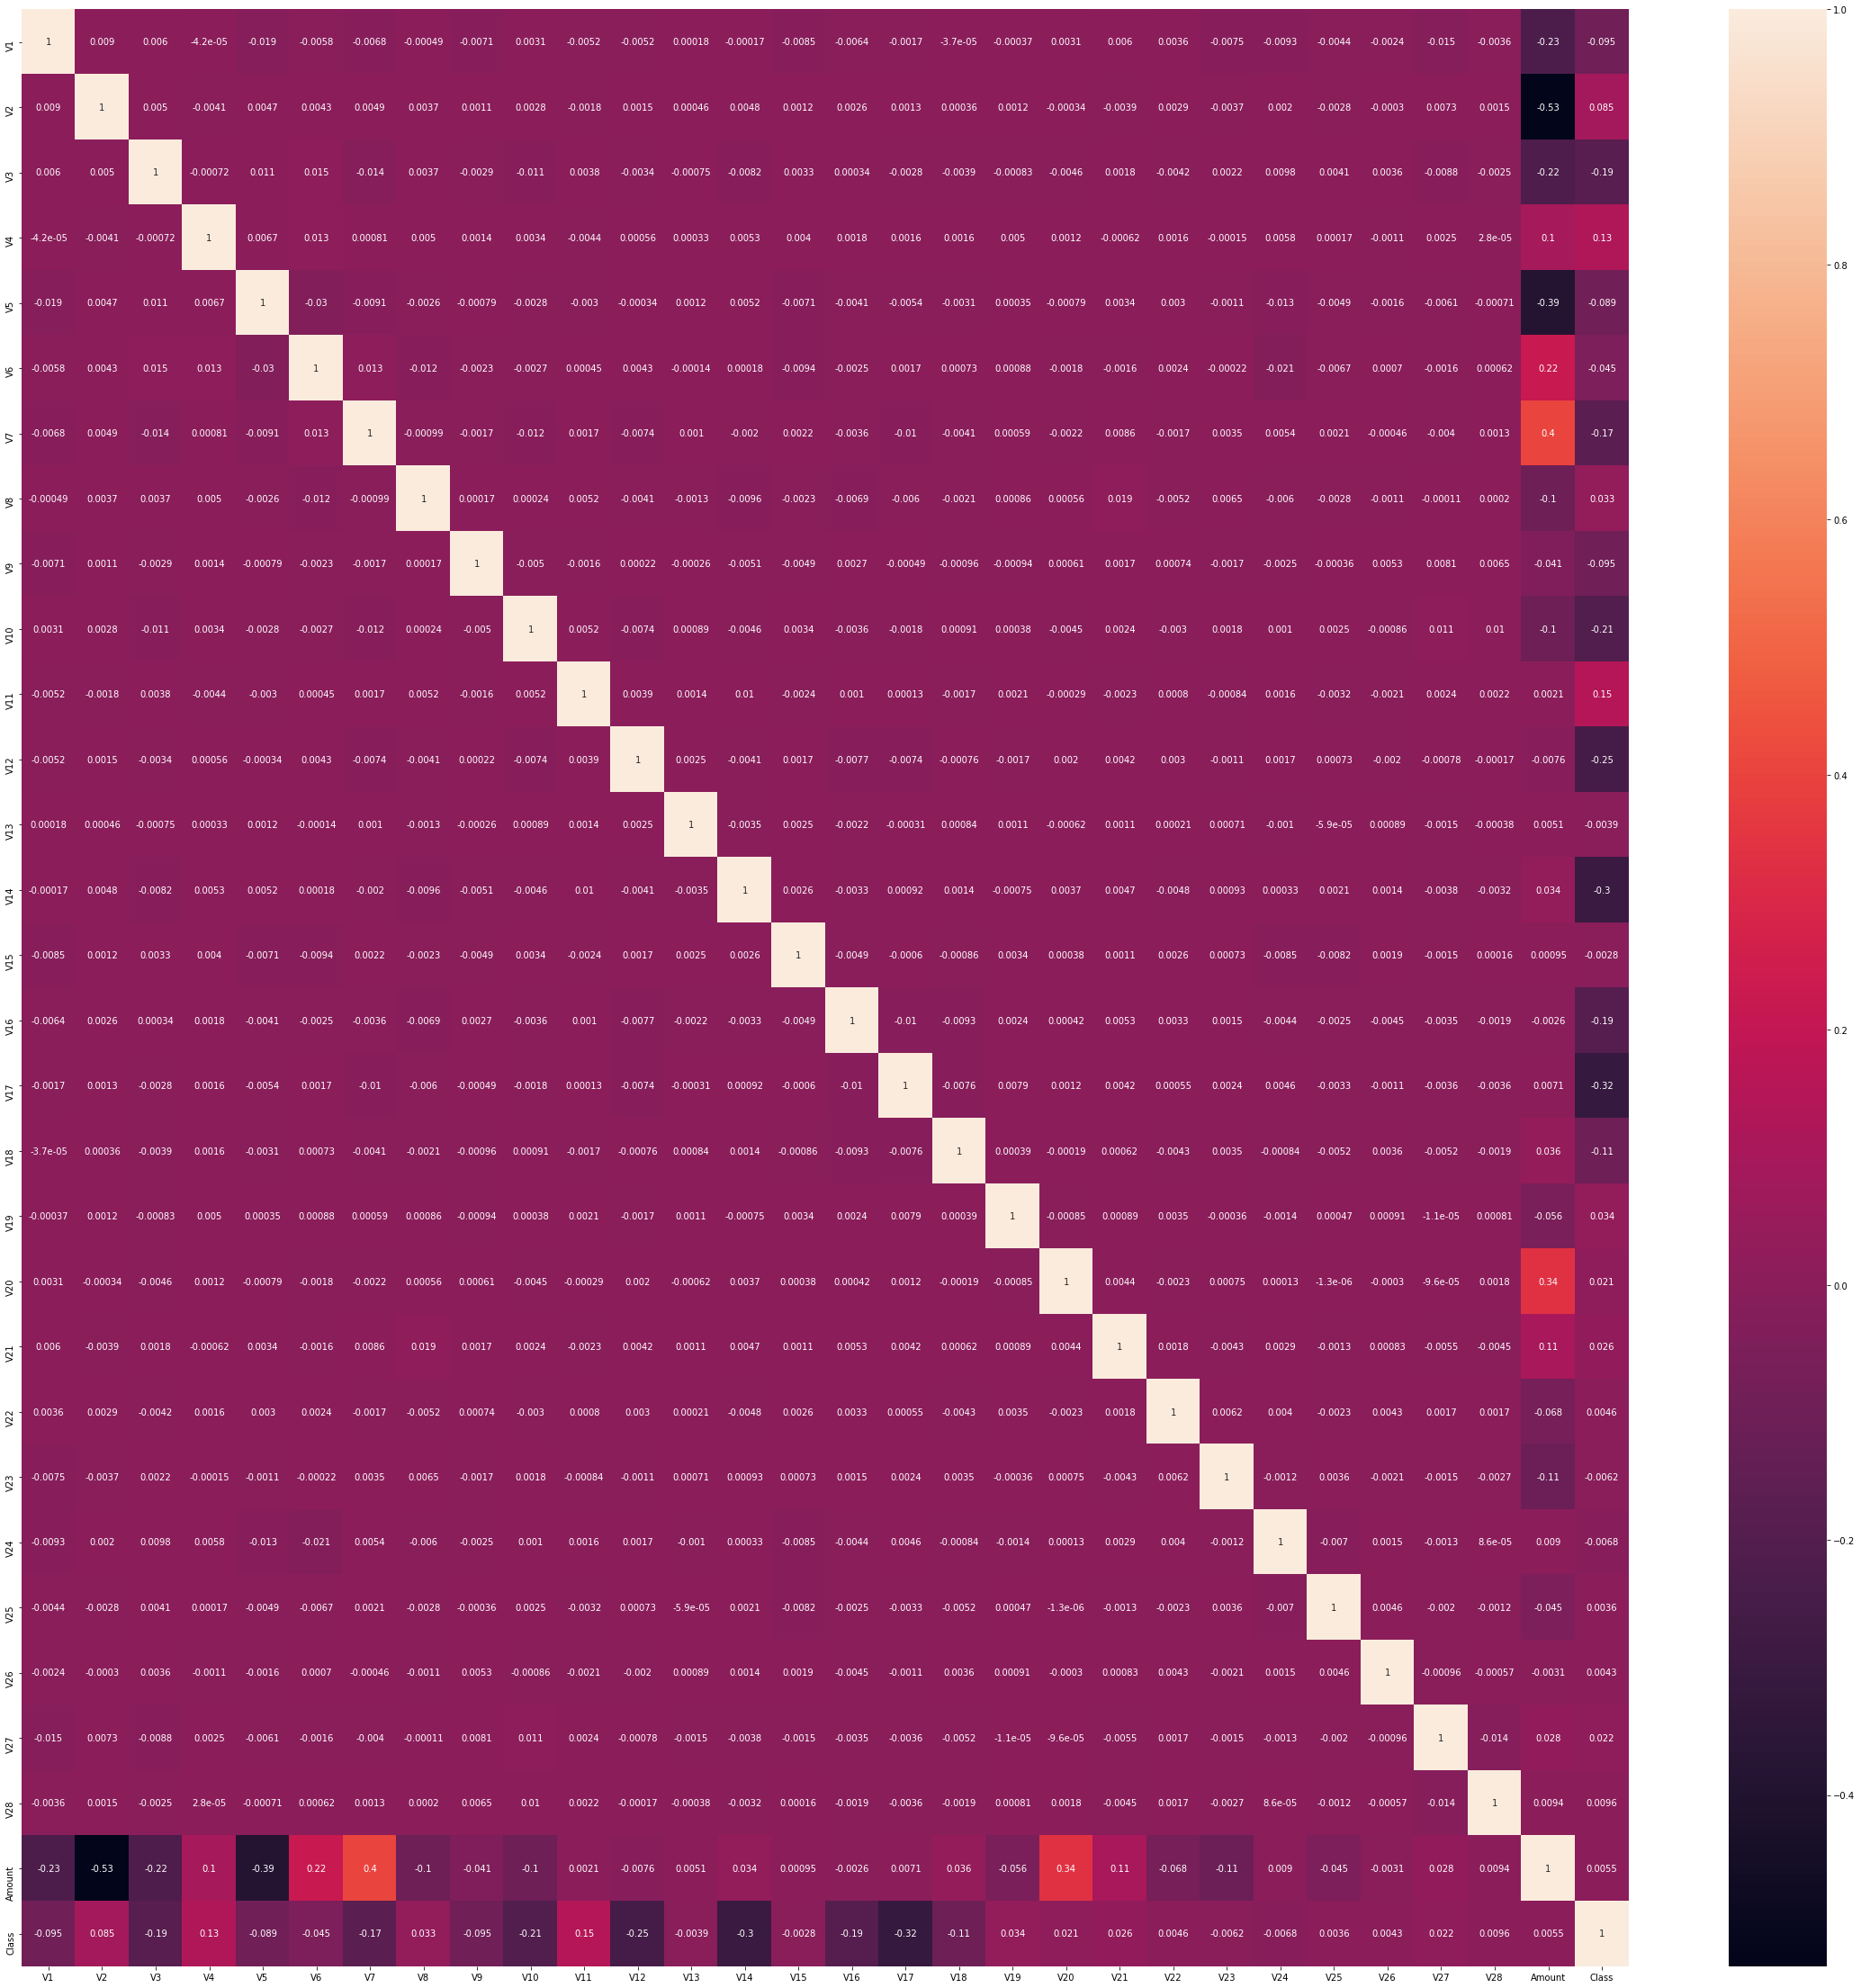

In [9]:
#correlation plot
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)

In [10]:
# separating the data into input and output values
x=df.drop(["Class"],axis=1)
y=df["Class"]

In [11]:
#function for outliers
def Outliers(data):
    for col in data:
        q1=data[col].describe()["25%"]
        q3=data[col].describe()["75%"]
        iqr=q3-q1
        lb=q1-(1.5*iqr)
        up=q3+(1.5*iqr)
        out=data[col][(data[col]<lb) | (data[col]>up)]
        num_out=out.shape[0]
        p=(num_out/data.shape[0])*100
        if(num_out>0):
            print("number of outliers", col ," : ",out.shape[0])
            print("percentage of ouliers in", col ," : ",p,"%")

# printing outliers and their percentage in their column
Outliers(data=x)

number of outliers V1  :  6828
percentage of ouliers in V1  :  2.4769374199656826 %
number of outliers V2  :  12813
percentage of ouliers in V2  :  4.648066661104319 %
number of outliers V3  :  3434
percentage of ouliers in V3  :  1.245723945542202 %
number of outliers V4  :  10474
percentage of ouliers in V4  :  3.7995668624371066 %
number of outliers V5  :  11578
percentage of ouliers in V5  :  4.200055865313807 %
number of outliers V6  :  21037
percentage of ouliers in V6  :  7.631419523113367 %
number of outliers V7  :  8616
percentage of ouliers in V7  :  3.1255554789725135 %
number of outliers V8  :  23942
percentage of ouliers in V8  :  8.685242488110482 %
number of outliers V9  :  7641
percentage of ouliers in V9  :  2.771862745453688 %
number of outliers V10  :  8900
percentage of ouliers in V10  :  3.228579823915433 %
number of outliers V11  :  662
percentage of ouliers in V11  :  0.2401482970148333 %
number of outliers V12  :  14735
percentage of ouliers in V12  :  5.3452947

In [12]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1,stratify=y)

In [13]:
# scaling the data to reduce outliers and bring the data to one scale level which makes it easy for model to run
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
# Using the SMOTE from imblearn to sample the data as the output is highly imbalanced
x_train,y_train=SMOTE().fit_sample(x_train,y_train)

# from sklearn.model_selection import KFold
# CV=KFold(n_splits=10,random_state=1,shuffle=True)

<b>Decision Tree Classifier

In [14]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree_pred=dtree.predict(x_test)
dtree_train_pred=dtree.predict(x_train)
#metrics
print(f'test accuracy:{accuracy_score(y_test,dtree_pred)}')
print(f'train accuracy:{accuracy_score(y_train,dtree_train_pred)}')
print(f'test calssification report:{classification_report(y_test,dtree_pred)}')
print(f'train classification report:{classification_report(y_train,dtree_train_pred)}')

test accuracy:0.9974697549561968
train accuracy:1.0
test calssification report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110077
           1       0.38      0.75      0.50       189

    accuracy                           1.00    110266
   macro avg       0.69      0.87      0.75    110266
weighted avg       1.00      1.00      1.00    110266

train classification report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165113
           1       1.00      1.00      1.00    165113

    accuracy                           1.00    330226
   macro avg       1.00      1.00      1.00    330226
weighted avg       1.00      1.00      1.00    330226



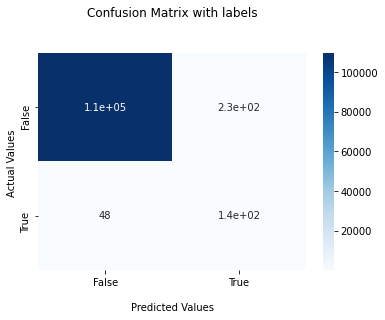

In [15]:
# plot to visualize the confusion matrix
DT_Matrix=confusion_matrix(y_test,dtree_pred)
DTmatrixplot=sns.heatmap(DT_Matrix, annot=True, cmap='Blues')
DTmatrixplot.set_title('Confusion Matrix with labels\n\n');
DTmatrixplot.set_xlabel('\nPredicted Values')
DTmatrixplot.set_ylabel('Actual Values ');
DTmatrixplot.xaxis.set_ticklabels(['False','True'])
DTmatrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

In [16]:
# Naive bayes
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
nb_train_pred=nb.predict(x_train)
print(f'test accuracy:{accuracy_score(y_test,nb_pred)}')
print(f'train accuracy:{accuracy_score(y_train,nb_train_pred)}')
print(f'test calssification report:{classification_report(y_test,nb_pred)}')
print(f'train classification report:{classification_report(y_train,nb_train_pred)}')

test accuracy:0.9751600674732012
train accuracy:0.9052194557666567
test calssification report:              precision    recall  f1-score   support

           0       1.00      0.98      0.99    110077
           1       0.06      0.86      0.11       189

    accuracy                           0.98    110266
   macro avg       0.53      0.92      0.55    110266
weighted avg       1.00      0.98      0.99    110266

train classification report:              precision    recall  f1-score   support

           0       0.86      0.98      0.91    165113
           1       0.97      0.84      0.90    165113

    accuracy                           0.91    330226
   macro avg       0.91      0.91      0.90    330226
weighted avg       0.91      0.91      0.90    330226



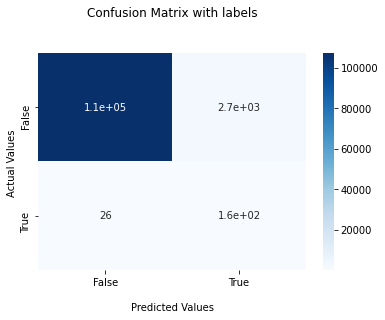

In [17]:
# Visualizing naive bayes confusion matrix
nb_Matrix=confusion_matrix(y_test,nb_pred)
nb_matrixplot=sns.heatmap(nb_Matrix, annot=True, cmap='Blues')
nb_matrixplot.set_title('Confusion Matrix with labels\n\n');
nb_matrixplot.set_xlabel('\nPredicted Values')
nb_matrixplot.set_ylabel('Actual Values ');
nb_matrixplot.xaxis.set_ticklabels(['False','True'])
nb_matrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

<b>Support Vector Machine classifier

In [ ]:
SVM=SVC(probability=True)
SVM.fit(x_train,y_train)
svm_pred=SVM.predict(x_test)
svm_train_pred=SVM.predict(x_train)
#metrics
print(f'test accuracy:{accuracy_score(y_test,svm_pred)}')
print(f'train accuracy:{accuracy_score(y_train,svm_train_pred)}')
print(f'test calssification report:{classification_report(y_test,svm_pred)}')
print(f'train classification report:{classification_report(y_train,svm_train_pred)}')

In [ ]:
#visualizing svm confusion matrix
svm_Matrix=confusion_matrix(y_test,svm_pred)
svm_matrixplot=sns.heatmap(svm_Matrix, annot=True, cmap='Blues')
svm_matrixplot.set_title('Confusion Matrix with labels\n\n');
svm_matrixplot.set_xlabel('\nPredicted Values')
svm_matrixplot.set_ylabel('Actual Values ');
svm_matrixplot.xaxis.set_ticklabels(['False','True'])
svm_matrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

<b>Multilayer perceptron

In [18]:
MLP=MLPClassifier()
MLP.fit(x_train,y_train)
mlp_pred=MLP.predict(x_test)
mlp_train_pred=MLP.predict(x_train)
print(f'test accuracy:{accuracy_score(y_test,mlp_pred)}')
print(f'train accuracy:{accuracy_score(y_train,mlp_train_pred)}')
print(f'test calssification report:{classification_report(y_test,mlp_pred)}')
print(f'train classification report:{classification_report(y_train,mlp_train_pred)}')

test accuracy:0.9976057896359712
train accuracy:0.999052164275375
test calssification report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110077
           1       0.40      0.78      0.53       189

    accuracy                           1.00    110266
   macro avg       0.70      0.89      0.76    110266
weighted avg       1.00      1.00      1.00    110266

train classification report:              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165113
           1       1.00      1.00      1.00    165113

    accuracy                           1.00    330226
   macro avg       1.00      1.00      1.00    330226
weighted avg       1.00      1.00      1.00    330226



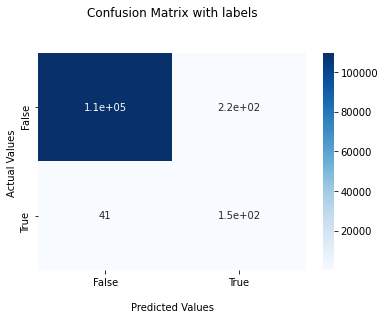

In [19]:
# confusion matrix
mlp_Matrix=confusion_matrix(y_test,mlp_pred)
mlp_matrixplot=sns.heatmap(mlp_Matrix, annot=True, cmap='Blues')
mlp_matrixplot.set_title('Confusion Matrix with labels\n\n');
mlp_matrixplot.set_xlabel('\nPredicted Values')
mlp_matrixplot.set_ylabel('Actual Values ');
mlp_matrixplot.xaxis.set_ticklabels(['False','True'])
mlp_matrixplot.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
# AUC ROC curve to compare the performance of models 
dtree_prob=dtree.predict_proba(x_test)
nb_prob=nb.predict_proba(x_test)
svm_prob=SVM.predict_proba(x_test)
mlp_prob=MLP.predict_proba(x_test)
dtree_prob=dtree_prob[:, 1]
nb_prob=nb_prob[:, 1]
svm_prob=svm_prob[:, 1]
mlp_prob=mlp_prob[:, 1]
ns_auc = roc_auc_score(y_test, ns_prob)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)#same for all algos'
dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_prob)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_prob)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (comparison)')
plt.plot(dtree_fpr, dtree_tpr, marker='.', label='decision tree')
plt.plot(nb_fpr, nb_tpr, marker='.', label='naive bayes')
plt.plot(svm_fpr, svm_tpr, marker='.', label='support vector machine')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Multi layer perceptron')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# THis is the code for Experiment 2 using SMOTE and StratifiedKfold crossvalidation 
# this code has a better generalization of the models
# the boxplot is plotted to compare the algorithms
# Code referenced Dr. Alireza Tamaddoni's labs
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
x_train,y_train=SMOTE().fit_sample(x_train,y_train)
# Spot Check Algorithms
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
# models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0, max_iter=100)))
models.append(('MLP', MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(2,), max_iter=50)))
models.append(('SVC', SVC(gamma = .001)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=3, random_state=1)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on breast cancer dataset')
pyplot.show()